## 今天的範例，帶著大家一起發現具有特徵的資料

In [ ]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
print(sklearn.__version__)
#如果只有 0.19 記得要更新至 最新版本
%matplotlib inline


0.23.1


## 產生一組資料集

In [ ]:
#用字典產生一組資料
data={'sex': ['Male','Male','Male','Male','Male','Female','Female','Female','Female','Female','Male','Male','Male','Male','Male','Female','Female','Female','Female','Female'],
      'insomnia':['Y','N','N','N','N','N','Y','Y','Y','N','Y','N','N','N','N','N','Y','Y','Y','N'],
     'age':[23,40,5,30,1,40,16,27,43,8,23,39,5,29,1,42,13,29,41,10],
     'height':[180,170,100,176,70,160,170,166,155,35,170,168,101,175,72,163,169,163,151,40],
     'weight':[100,68,20,70,10,45,50,58,58,17,101,65,22,79,12,40,53,52,56,14]}
#轉成 dataframe格式 
data=pd.DataFrame(data)
display(data)

print(data.info())

,sex,insomnia,age,height,weight
0,Male,Y,23,180,100
1,Male,N,40,170,68
2,Male,N,5,100,20
3,Male,N,30,176,70
4,Male,N,1,70,10
5,Female,N,40,160,45
6,Female,Y,16,170,50
7,Female,Y,27,166,58
8,Female,Y,43,155,58
9,Female,N,8,35,17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       20 non-null     object
 1   insomnia  20 non-null     object
 2   age       20 non-null     int64 
 3   height    20 non-null     int64 
 4   weight    20 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 928.0+ bytes
None


## 我們要找那些資料點和失眠相關，具有特徵的變異性?

### 具有變異性的資料 

## 連續型資料

In [ ]:
# 計算變異數的方法
print("男孩身高變異數=",statistics.variance(data['age']))
print("男孩身高變異數=",np.var(data['age'],ddof=1))

男孩身高變異數= 221.77631578947367
男孩身高變異數= 221.77631578947367


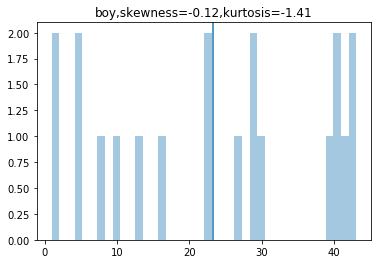

In [ ]:
#最後，畫圖看分布
plt.hist(data['age'],alpha=.4,bins=40)
plt.title('boy,skewness={0},kurtosis={1}'.format(round(stats.skew(data['age']),2),round(stats.kurtosis(data['age']),2)))
plt.axvline(x=np.mean(data['age']))
plt.show()

In [ ]:
## 可由變異數等分散變量與圖形，判斷資料是否有變異性，以這個例子，年紀是具有變異性的特徵。

## 離散型資料

In [ ]:
data[['insomnia','sex']].groupby('sex').count()

,insomnia
sex,
Female,10
Male,10


In [ ]:
data[data['insomnia']=='Y'].groupby('sex').count()
#當離散型資料不集中於某一個欄位，如此資料集，則稱為具有變異性

,insomnia,age,height,weight
sex,,,,
Female,6,6,6,6
Male,2,2,2,2


### 衍生資料的方法:
把原始資料做一些轉換，萃取出和目標變數相關的特徵，大致上可以分成以下幾種類型， 稱作 ICR 步驟。
* 指示器變量(Indicator)
* 資料組合(Combination)
* 資料重新定義(Reshape)


### 指示器變量(Indicator)
這邊我們運用 Weight 這個變數來當例子，進行示範
![image.png](attachment:image.png)

In [ ]:
# 運用 apply function  做變數轉換
data['weight_new']=data['weight'].apply((lambda x: 1 if x >=100 else 0))

display(data.head(5))

,sex,insomnia,age,height,weight,weight_new
0,Male,Y,23,180,100,1
1,Male,N,40,170,68,0
2,Male,N,5,100,20,0
3,Male,N,30,176,70,0
4,Male,N,1,70,10,0


### 資料組合(Combination)
![image.png](attachment:image.png)

In [ ]:
# 運用四則運算，來做計算
data['BMI']=round(data['weight']/data['height']/data['height']*100*100,2)

display(data.head(5))

,sex,insomnia,age,height,weight,weight_new,BMI
0,Male,Y,23,180,100,1,30.86
1,Male,N,40,170,68,0,23.53
2,Male,N,5,100,20,0,20.00
3,Male,N,30,176,70,0,22.60
4,Male,N,1,70,10,0,20.41


###  資料重新定義(Reshape)

1. 資料收集長度調整:
預測地下水水位，時雨量比10分鐘及時雨量還好，沒有時間遞延問題，透過調整增強數據所能表達的信息。
2. 數值到分類的映射: 
可以將年齡，分成兒童、青少年、青年與青壯年各個年級的資料。
3. 合併稀疏分類: 
發現年齡中，某一個年齡層人數偏少，可以做合併的動作。
4. 表達類別型資料的距離:
重新定義類別資料距離: 比如年齡資料，兒童、青少年與成年可轉換為1,2,3。
5. 創造虛擬資料:
這取決與機器學習算法的實現，將類別特徵轉換到虛擬變量中去。



In [ ]:
## 數值到分類的映射
# 運用 apply function  做變數轉換
def age_map(x): 
    if(x<=12):
        return('child')
    else: 
        if(x<=18):
            return('teens')
        else:
            return('adult')
    
data['age_category']=data['age'].apply(age_map)

display(data)


,sex,insomnia,age,height,weight,weight_new,BMI,age_category
0,Male,Y,23,180,100,1,30.86,adult
1,Male,N,40,170,68,0,23.53,adult
2,Male,N,5,100,20,0,20.00,child
3,Male,N,30,176,70,0,22.60,adult
4,Male,N,1,70,10,0,20.41,child
5,Female,N,40,160,45,0,17.58,adult
6,Female,Y,16,170,50,0,17.30,teens
7,Female,Y,27,166,58,0,21.05,adult
8,Female,Y,43,155,58,0,24.14,adult
9,Female,N,8,35,17,0,138.78,child


In [ ]:
## 合併稀疏分類
contTable = pd.crosstab(data['age_category'], data['insomnia'])
contTable
# 有兩個零的存在，太過稀疏，有時候會將 age_category中的 child  和 teens 合併，但如果最後應用端要把 age 分成三種類型的話，就不會合併


insomnia,N,Y
age_category,,
adult,6,6
child,6,0
teens,0,2


In [ ]:
##現在假設要合併的話可以怎麼做?
#產生一個新的 mapping function 然後做調整
def age_map_2(x): 
    if(x<=18):
        return('child_teens')
    else:
        return('adult')
    
data['age_category']=data['age'].apply(age_map_2)

display(data)

,sex,insomnia,age,height,weight,weight_new,BMI,age_category
0,Male,Y,23,180,100,1,30.86,adult
1,Male,N,40,170,68,0,23.53,adult
2,Male,N,5,100,20,0,20.00,child_teens
3,Male,N,30,176,70,0,22.60,adult
4,Male,N,1,70,10,0,20.41,child_teens
5,Female,N,40,160,45,0,17.58,adult
6,Female,Y,16,170,50,0,17.30,child_teens
7,Female,Y,27,166,58,0,21.05,adult
8,Female,Y,43,155,58,0,24.14,adult
9,Female,N,8,35,17,0,138.78,child_teens


In [ ]:
#定義類別資料距離
data['age_category']=data['age'].apply(age_map)
size_mapping = {'child':1, 'teens':2, 'adult':3}
data['age_conti'] = data['age_category'].map(size_mapping)
display(data)

,sex,insomnia,age,height,weight,weight_new,BMI,age_category,age_conti
0,Male,Y,23,180,100,1,30.86,adult,3
1,Male,N,40,170,68,0,23.53,adult,3
2,Male,N,5,100,20,0,20.00,child,1
3,Male,N,30,176,70,0,22.60,adult,3
4,Male,N,1,70,10,0,20.41,child,1
5,Female,N,40,160,45,0,17.58,adult,3
6,Female,Y,16,170,50,0,17.30,teens,2
7,Female,Y,27,166,58,0,21.05,adult,3
8,Female,Y,43,155,58,0,24.14,adult,3
9,Female,N,8,35,17,0,138.78,child,1


In [ ]:
# 先將需要的欄取出
b = data[['age_category']]
#columns 代表取出欄位,透過 prefix 來調整欄位名稱
dummy=pd.get_dummies(b, columns=['age_category'], prefix=['age'])
#資料合併
data=pd.concat([data,dummy],axis=1)
display(data)

,sex,insomnia,age,height,weight,weight_new,BMI,age_category,age_conti,age_adult,age_child,age_teens
0,Male,Y,23,180,100,1,30.86,adult,3,1,0,0
1,Male,N,40,170,68,0,23.53,adult,3,1,0,0
2,Male,N,5,100,20,0,20.00,child,1,0,1,0
3,Male,N,30,176,70,0,22.60,adult,3,1,0,0
4,Male,N,1,70,10,0,20.41,child,1,0,1,0
5,Female,N,40,160,45,0,17.58,adult,3,1,0,0
6,Female,Y,16,170,50,0,17.30,teens,2,0,0,1
7,Female,Y,27,166,58,0,21.05,adult,3,1,0,0
8,Female,Y,43,155,58,0,24.14,adult,3,1,0,0
9,Female,N,8,35,17,0,138.78,child,1,0,1,0
